<a href="https://colab.research.google.com/github/minun001/Data-analysis/blob/main/%EC%A7%91%EA%B0%92%EC%98%88%EC%B8%A1%EC%84%A0%ED%98%95%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**빅데이터공학과 20211464 민현식**

1. http://rtdown.molit.go.kr/ 에 가서 본인이 거주하고 있는 특정 지역을 선정하고  최근 1년 날짜 (2021년 10월 31일 -2022년 10월 31일) 의 데이터를 받으세요.
-> 실거래가 구분은 아파트 (매매) 로 고정합니다. 아래 그림과 같은 예로 1,2,3 부분에 본인이 거주하는 특정 지역을 선정하고 나머지 부분은 그림과 같은 상태에서 다운로드 버튼을 누르세요.

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 그래프 한글깨짐 해결
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [ ]:
#1.
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score

원천동_data = pd.read_csv('/content/drive/MyDrive/데이터/아파트(매매)_실거래가_원천동.csv')
이의동_data = pd.read_csv('/content/drive/MyDrive/데이터/아파트(매매)_실거래가_이의동.csv')
하동_data = pd.read_csv('/content/drive/MyDrive/데이터/아파트(매매)_실거래가_하동.csv')

In [ ]:
원천동_data.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,경기도 수원영통구 원천동,604,604,0,광교더샵,84.1755,202112,22,"133,000",20,2018,광교호수로 15,NaN,중개거래,경기 수원영통구
1,경기도 수원영통구 원천동,604,604,0,광교더샵,91.3754,202201,14,"140,000",3,2018,광교호수로 15,NaN,중개거래,경기 수원영통구
2,경기도 수원영통구 원천동,604,604,0,광교더샵,84.1755,202203,4,"120,000",30,2018,광교호수로 15,NaN,중개거래,경기 수원영통구
3,경기도 수원영통구 원천동,604,604,0,광교더샵,84.2888,202205,14,"123,000",35,2018,광교호수로 15,NaN,중개거래,경기 수원영통구
4,경기도 수원영통구 원천동,604,604,0,광교더샵,91.3754,202208,5,"130,000",21,2018,광교호수로 15,NaN,중개거래,경기 수원영통구


In [ ]:
원천동_data.tail()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
120,경기도 수원영통구 원천동,35,35,0,주공,66.56,202201,25,"70,000",6,1987,중부대로271번길 27-9,NaN,중개거래,경기 수원영통구
121,경기도 수원영통구 원천동,35,35,0,주공,41.30,202203,15,"45,000",6,1987,중부대로271번길 27-9,NaN,중개거래,경기 수원영통구
122,경기도 수원영통구 원천동,35,35,0,주공,41.30,202203,26,"45,900",4,1987,중부대로271번길 27-9,NaN,중개거래,경기 수원영통구
123,경기도 수원영통구 원천동,35,35,0,주공,41.30,202205,18,"45,000",14,1987,중부대로271번길 27-9,NaN,중개거래,경기 수원영통구
124,경기도 수원영통구 원천동,35,35,0,주공,49.94,202206,26,"52,500",7,1987,중부대로271번길 27-9,NaN,중개거래,경기 수원영통구


In [ ]:
이의동_data.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,경기도 수원영통구 이의동,1332,1332,0,SummitPlace광교,116.705,202111,19,"166,000",8,2015,센트럴타운로 85,NaN,중개거래,경기 수원영통구
1,경기도 수원영통구 이의동,1332,1332,0,SummitPlace광교,116.705,202203,12,"158,000",29,2015,센트럴타운로 85,NaN,중개거래,경기 수원영통구
2,경기도 수원영통구 이의동,1332,1332,0,SummitPlace광교,116.345,202203,19,"149,000",5,2015,센트럴타운로 85,NaN,중개거래,경기 수원영통구
3,경기도 수원영통구 이의동,1332,1332,0,SummitPlace광교,116.705,202204,21,"142,000",4,2015,센트럴타운로 85,NaN,중개거래,경기 수원영통구
4,경기도 수원영통구 이의동,1332,1332,0,SummitPlace광교,107.418,202205,11,"152,000",24,2015,센트럴타운로 85,NaN,중개거래,경기 수원영통구


In [ ]:
이의동_data.tail()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
120,경기도 수원영통구 이의동,1344,1344,0,자연앤힐스테이트,84.28,202206,25,"139,000",2,2012,도청로 65,NaN,중개거래,경기 수원영통구
121,경기도 수원영통구 이의동,1344,1344,0,자연앤힐스테이트,84.53,202207,2,"147,000",17,2012,도청로 65,NaN,중개거래,경기 수원영통구
122,경기도 수원영통구 이의동,1344,1344,0,자연앤힐스테이트,84.37,202207,27,"130,000",19,2012,도청로 65,NaN,중개거래,경기 수원영통구
123,경기도 수원영통구 이의동,1344,1344,0,자연앤힐스테이트,84.50,202209,15,"120,000",29,2012,도청로 65,NaN,중개거래,경기 수원영통구
124,경기도 수원영통구 이의동,1344,1344,0,자연앤힐스테이트,84.53,202210,17,"122,000",26,2012,도청로 65,NaN,중개거래,경기 수원영통구


In [ ]:
하동_data.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,경기도 수원영통구 하동,1027,1027,0,광교LAKEPARK한양수자인,84.7654,202111,5,"89,750",3,2012,광교호수로152번길 23,NaN,중개거래,경기 수원영통구
1,경기도 수원영통구 하동,1027,1027,0,광교LAKEPARK한양수자인,84.8201,202201,29,"83,000",5,2012,광교호수로152번길 23,NaN,중개거래,경기 수원영통구
2,경기도 수원영통구 하동,1027,1027,0,광교LAKEPARK한양수자인,84.7654,202203,25,"92,500",16,2012,광교호수로152번길 23,NaN,중개거래,경기 수원영통구
3,경기도 수원영통구 하동,1027,1027,0,광교LAKEPARK한양수자인,84.8442,202205,26,"83,200",22,2012,광교호수로152번길 23,NaN,중개거래,경기 수원영통구
4,경기도 수원영통구 하동,1027,1027,0,광교LAKEPARK한양수자인,84.8201,202206,9,"84,500",26,2012,광교호수로152번길 23,NaN,중개거래,경기 수원영통구


In [ ]:
하동_data.tail()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
47,경기도 수원영통구 하동,1021,1021,0,힐스테이트광교,97.5910,202207,4,"160,000",17,2018,센트럴파크로 6,NaN,중개거래,경기 수원영통구
48,경기도 수원영통구 하동,1021,1021,0,힐스테이트광교,97.5548,202207,22,"165,000",21,2018,센트럴파크로 6,NaN,중개거래,경기 수원영통구
49,경기도 수원영통구 하동,1021,1021,0,힐스테이트광교,97.5910,202207,30,"155,000",40,2018,센트럴파크로 6,NaN,중개거래,경기 수원영통구
50,경기도 수원영통구 하동,1021,1021,0,힐스테이트광교,97.4060,202208,4,"175,000",40,2018,센트럴파크로 6,NaN,중개거래,경기 수원영통구
51,경기도 수원영통구 하동,1021,1021,0,힐스테이트광교,97.5548,202208,25,"160,000",13,2018,센트럴파크로 6,NaN,중개거래,경기 수원영통구


In [ ]:
house_df = pd.concat([원천동_data,이의동_data,하동_data],axis = 0)
house_df.reset_index(drop = False, inplace = True)
house_df.sort_values('계약년월')
house_df.head()

,index,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,0,경기도 수원영통구 원천동,604,604,0,광교더샵,84.1755,202112,22,"133,000",20,2018,광교호수로 15,NaN,중개거래,경기 수원영통구
1,1,경기도 수원영통구 원천동,604,604,0,광교더샵,91.3754,202201,14,"140,000",3,2018,광교호수로 15,NaN,중개거래,경기 수원영통구
2,2,경기도 수원영통구 원천동,604,604,0,광교더샵,84.1755,202203,4,"120,000",30,2018,광교호수로 15,NaN,중개거래,경기 수원영통구
3,3,경기도 수원영통구 원천동,604,604,0,광교더샵,84.2888,202205,14,"123,000",35,2018,광교호수로 15,NaN,중개거래,경기 수원영통구
4,4,경기도 수원영통구 원천동,604,604,0,광교더샵,91.3754,202208,5,"130,000",21,2018,광교호수로 15,NaN,중개거래,경기 수원영통구


In [ ]:
house_df.tail()

,index,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
297,47,경기도 수원영통구 하동,1021,1021,0,힐스테이트광교,97.5910,202207,4,"160,000",17,2018,센트럴파크로 6,NaN,중개거래,경기 수원영통구
298,48,경기도 수원영통구 하동,1021,1021,0,힐스테이트광교,97.5548,202207,22,"165,000",21,2018,센트럴파크로 6,NaN,중개거래,경기 수원영통구
299,49,경기도 수원영통구 하동,1021,1021,0,힐스테이트광교,97.5910,202207,30,"155,000",40,2018,센트럴파크로 6,NaN,중개거래,경기 수원영통구
300,50,경기도 수원영통구 하동,1021,1021,0,힐스테이트광교,97.4060,202208,4,"175,000",40,2018,센트럴파크로 6,NaN,중개거래,경기 수원영통구
301,51,경기도 수원영통구 하동,1021,1021,0,힐스테이트광교,97.5548,202208,25,"160,000",13,2018,센트럴파크로 6,NaN,중개거래,경기 수원영통구


In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     302 non-null    int64  
 1   시군구       302 non-null    object 
 2   번지        302 non-null    object 
 3   본번        302 non-null    int64  
 4   부번        302 non-null    int64  
 5   단지명       302 non-null    object 
 6   전용면적(㎡)   302 non-null    float64
 7   계약년월      302 non-null    int64  
 8   계약일       302 non-null    int64  
 9   거래금액(만원)  302 non-null    object 
 10  층         302 non-null    int64  
 11  건축년도      302 non-null    int64  
 12  도로명       302 non-null    object 
 13  해제사유발생일   10 non-null     float64
 14  거래유형      302 non-null    object 
 15  중개사소재지    302 non-null    object 
dtypes: float64(2), int64(7), object(7)
memory usage: 37.9+ KB


In [ ]:
house_df.isnull().sum()

index         0
시군구           0
번지            0
본번            0
부번            0
단지명           0
전용면적(㎡)       0
계약년월          0
계약일           0
거래금액(만원)      0
층             0
건축년도          0
도로명           0
해제사유발생일     292
거래유형          0
중개사소재지        0
dtype: int64

In [ ]:
#전용면적(㎡)를 int로 바꾸어 전용면적(㎡)별로 값을 지정하려고 함.
house_평수 = pd.concat([원천동_data,이의동_data,하동_data],axis = 0)
house_평수.reset_index(drop = False, inplace = True)
house_평수["전용면적(㎡)"] = house_평수["전용면적(㎡)"].astype(int)
house_평수.head()
house_평수

,index,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,0,경기도 수원영통구 원천동,604,604,0,광교더샵,84,202112,22,"133,000",20,2018,광교호수로 15,NaN,중개거래,경기 수원영통구
1,1,경기도 수원영통구 원천동,604,604,0,광교더샵,91,202201,14,"140,000",3,2018,광교호수로 15,NaN,중개거래,경기 수원영통구
2,2,경기도 수원영통구 원천동,604,604,0,광교더샵,84,202203,4,"120,000",30,2018,광교호수로 15,NaN,중개거래,경기 수원영통구
3,3,경기도 수원영통구 원천동,604,604,0,광교더샵,84,202205,14,"123,000",35,2018,광교호수로 15,NaN,중개거래,경기 수원영통구
4,4,경기도 수원영통구 원천동,604,604,0,광교더샵,91,202208,5,"130,000",21,2018,광교호수로 15,NaN,중개거래,경기 수원영통구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,47,경기도 수원영통구 하동,1021,1021,0,힐스테이트광교,97,202207,4,"160,000",17,2018,센트럴파크로 6,NaN,중개거래,경기 수원영통구
298,48,경기도 수원영통구 하동,1021,1021,0,힐스테이트광교,97,202207,22,"165,000",21,2018,센트럴파크로 6,NaN,중개거래,경기 수원영통구
299,49,경기도 수원영통구 하동,1021,1021,0,힐스테이트광교,97,202207,30,"155,000",40,2018,센트럴파크로 6,NaN,중개거래,경기 수원영통구
300,50,경기도 수원영통구 하동,1021,1021,0,힐스테이트광교,97,202208,4,"175,000",40,2018,센트럴파크로 6,NaN,중개거래,경기 수원영통구


In [ ]:
house_평수.isnull().sum()

index         0
시군구           0
번지            0
본번            0
부번            0
단지명           0
전용면적(㎡)       0
계약년월          0
계약일           0
거래금액(만원)      0
층             0
건축년도          0
도로명           0
해제사유발생일     292
거래유형          0
중개사소재지        0
dtype: int64

In [ ]:
house_평수.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     302 non-null    int64  
 1   시군구       302 non-null    object 
 2   번지        302 non-null    object 
 3   본번        302 non-null    int64  
 4   부번        302 non-null    int64  
 5   단지명       302 non-null    object 
 6   전용면적(㎡)   302 non-null    int64  
 7   계약년월      302 non-null    int64  
 8   계약일       302 non-null    int64  
 9   거래금액(만원)  302 non-null    object 
 10  층         302 non-null    int64  
 11  건축년도      302 non-null    int64  
 12  도로명       302 non-null    object 
 13  해제사유발생일   10 non-null     float64
 14  거래유형      302 non-null    object 
 15  중개사소재지    302 non-null    object 
dtypes: float64(1), int64(8), object(7)
memory usage: 37.9+ KB


In [ ]:
전용면적 = house_평수["전용면적(㎡)"]
전용면적

0      84
1      91
2      84
3      84
4      91
       ..
297    97
298    97
299    97
300    97
301    97
Name: 전용면적(㎡), Length: 302, dtype: int64

2. 다운 받은 엑셀 데이터를 "전용면적(㎡)","거래금액(만원)","층의 정보(예: 9층)","건축년도" 로 구글 코랩에 데이터 전처리를 통해서 4개의 컬럼으로 되어 있는 데이터프래임으로 저장하세요. (강의록과 강의콘텐츠 소스코드 참조)

In [ ]:
#2.
house_df1 = pd.DataFrame(house_df, columns = ["전용면적(㎡)", "거래금액(만원)", "층", "건축년도"])
house_df1.rename(columns = {"층":"층의 정보(예: 9층)"}, inplace = True)
house_df1

,전용면적(㎡),거래금액(만원),층의 정보(예: 9층),건축년도
0,84.1755,"133,000",20,2018
1,91.3754,"140,000",3,2018
2,84.1755,"120,000",30,2018
3,84.2888,"123,000",35,2018
4,91.3754,"130,000",21,2018
...,...,...,...,...
297,97.5910,"160,000",17,2018
298,97.5548,"165,000",21,2018
299,97.5910,"155,000",40,2018
300,97.4060,"175,000",40,2018


In [ ]:
house_ML = pd.DataFrame(house_df, columns = ["전용면적(㎡)", "층", "건축년도", "거래금액(만원)"])
house_ML["거래금액(만원)"] = house_ML["거래금액(만원)"].str.replace(',', '').astype('int64')

In [ ]:
house_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 73 to 289
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   전용면적(㎡)   10 non-null     float64
 1   층         10 non-null     int64  
 2   건축년도      10 non-null     int64  
 3   거래금액(만원)  10 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 400.0 bytes


In [ ]:
house_ML.fillna(house_ML.mean())

,전용면적(㎡),층,건축년도,거래금액(만원)
73,49.1400,11,1992,31000
143,101.1899,15,2012,159500
151,120.7597,1,2012,152000
190,122.0510,15,2011,128500
197,100.5130,11,2017,141000
201,100.5130,15,2017,105000
228,84.2800,16,2012,154000
264,74.9700,17,2013,83000
265,74.9700,17,2013,83000
289,84.8500,3,2011,100000


3. 본인이 살고 있는 특정 지역에 최근 3개월 날짜 (2022년 8월 -2022년 10월) 의 데이터를 가져와 집 값 변화를 선형 그래프로 표현하세요.

In [ ]:
#3.
house_df2 = pd.DataFrame(house_df, columns = ["계약년월", "거래금액(만원)"])
house_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   계약년월      302 non-null    int64 
 1   거래금액(만원)  302 non-null    object
dtypes: int64(1), object(1)
memory usage: 4.8+ KB


In [ ]:
#해당 월별 데이터 추출
d1 = house_df2[house_df2["계약년월"] == 202208]
d2 = house_df2[house_df2["계약년월"] == 202209]
d3 = house_df2[house_df2["계약년월"] == 202210]

d4 = house_df2[house_df2["계약년월"] == 202208]
d5 = house_df2[house_df2["계약년월"] == 202209]
d6 = house_df2[house_df2["계약년월"] == 202210]

#"거래금액(만원)" ','없애기
d1["거래금액(만원)"] = d1["거래금액(만원)"].str.replace(',', '').astype('int64')
d2["거래금액(만원)"] = d2["거래금액(만원)"].str.replace(',', '').astype('int64')
d3["거래금액(만원)"] = d3["거래금액(만원)"].str.replace(',', '').astype('int64')

#거래금액(만원) 평균구하기
d1["거래금액(만원)"] = d1["거래금액(만원)"].mean()
d2["거래금액(만원)"] = d2["거래금액(만원)"].mean()
d3["거래금액(만원)"] = d3["거래금액(만원)"].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
#데이터 프레임 생성 및 데이터 프레임 정리
# 평균을 활용한 데이터 EDA
house_df3 = pd.concat([d1,d2,d3],axis = 0)
house_df3.reset_index(drop = False, inplace = True)
house_df3["계약년월"] = house_df3["계약년월"].astype(str)
house_df3 = house_df3.drop(["index"],axis = 'columns')
house_df3.head()

,계약년월,거래금액(만원)
0,202208,92452.380952
1,202208,92452.380952
2,202208,92452.380952
3,202208,92452.380952
4,202208,92452.380952


In [ ]:
house_df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   계약년월      44 non-null     object 
 1   거래금액(만원)  44 non-null     float64
dtypes: float64(1), object(1)
memory usage: 832.0+ bytes


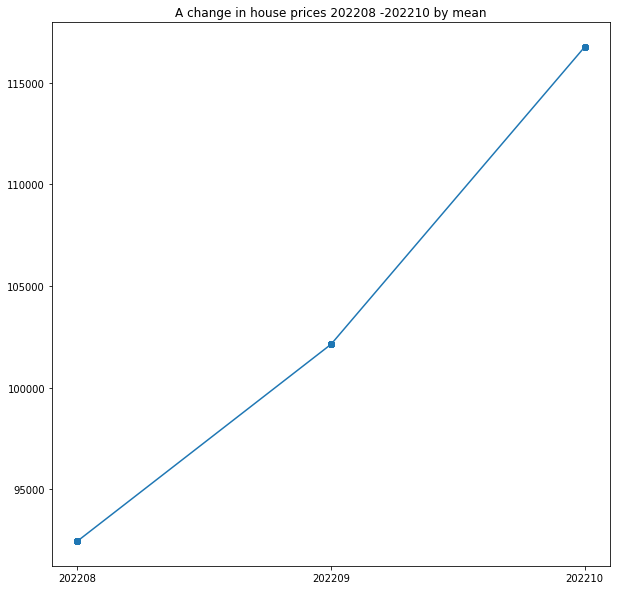

In [ ]:
# 월별 평균 가격 시각화
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
ax = fig.add_subplot() 
 
ax.plot(house_df3["계약년월"],house_df3["거래금액(만원)"], marker='o')
 
plt.title('A change in house prices 202208 -202210 by mean') ## 타이틀 설정
plt.show()

In [ ]:
#데이터 프레임 생성 및 데이터 프레임 정리
# 중앙값을 활용한 데이터 EDA
d1["거래금액(만원)"] = d1["거래금액(만원)"].median()
d2["거래금액(만원)"] = d2["거래금액(만원)"].median()
d3["거래금액(만원)"] = d3["거래금액(만원)"].median()

house_df3_1 = pd.concat([d1,d2,d3],axis = 0)
house_df3_1.reset_index(drop = False, inplace = True)
house_df3_1["계약년월"] = house_df3_1["계약년월"].astype(str)
house_df3_1 = house_df3_1.drop(["index"],axis = 'columns')
house_df3_1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,계약년월,거래금액(만원)
0,202208,92452.380952
1,202208,92452.380952
2,202208,92452.380952
3,202208,92452.380952
4,202208,92452.380952


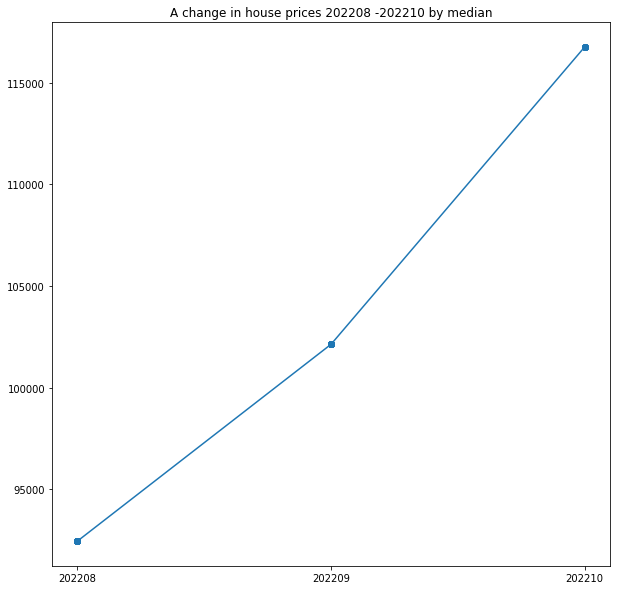

In [ ]:
# 월별 중앙값 가격 시각화
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
ax = fig.add_subplot() 
 
ax.plot(house_df3_1["계약년월"],house_df3_1["거래금액(만원)"], marker='o')
 
plt.title('A change in house prices 202208 -202210 by median') ## 타이틀 설정
plt.show()

In [ ]:
#데이터 프레임 생성 및 데이터 프레임 정리
# 아무 처리 하지 않은 일반 데이터 활용
house_df4 = pd.concat([d4,d5,d6],axis = 0)
house_df4.reset_index(drop = False, inplace = True)
house_df4["계약년월"] = house_df4["계약년월"].astype(str)
house_df4 = house_df4.drop(["index"],axis = 'columns')
house_df4.head()

,계약년월,거래금액(만원)
0,202208,"130,000"
1,202208,"110,000"
2,202208,"131,500"
3,202208,"152,000"
4,202208,"157,000"


In [ ]:
house_df4['계약년월'] = house_df4['계약년월'].astype('int')
house_df4 = house_df4.sort_values(by=['계약년월','거래금액(만원)'] ,ascending = True)
house_df4.reset_index(drop = False, inplace = True)
house_df4 = house_df4.drop(["index"],axis = 'columns')
house_df4.head()

,계약년월,거래금액(만원)
0,202208,"14,000"
1,202208,"14,000"
2,202208,"21,000"
3,202208,"27,000"
4,202208,"30,500"


In [ ]:
from datetime import datetime
house_df4['계약년월'] = house_df4['계약년월'].astype('str')
house_df4['계약년월'].apply(lambda _ : datetime.strptime(_,'%Y%m'))
house_df4.head()

,계약년월,거래금액(만원)
0,202208,"14,000"
1,202208,"14,000"
2,202208,"21,000"
3,202208,"27,000"
4,202208,"30,500"


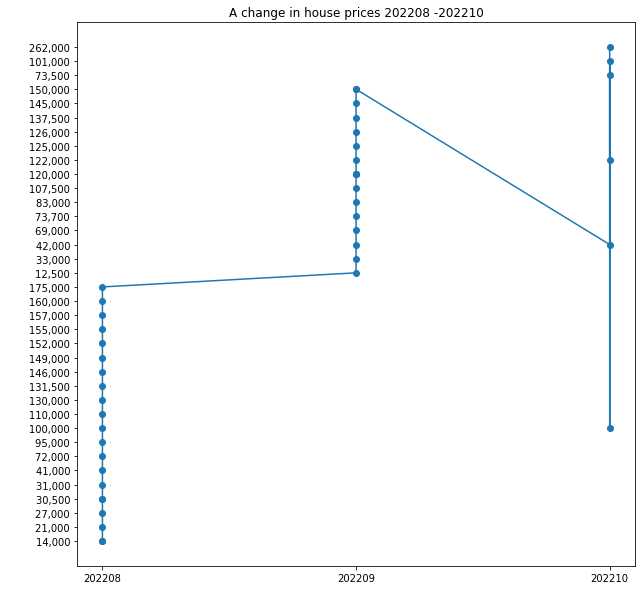

In [ ]:
# 월별 가격 시각화
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
ax = fig.add_subplot() 
 
ax.plot(house_df4["계약년월"],house_df4["거래금액(만원)"], marker='o')
 
plt.title('A change in house prices 202208 -202210') ## 타이틀 설정
plt.show()

위와 같은 그래프가 나오기 때문에 집값을 전용면적 별로 나누기로 함.

단, 전체 기간의 추이를 보기위해 전체 기간으로 설정하고 시각화 함.

In [ ]:
# 전용면적 정수화한 데이터 프레임에서 "계약년월", "거래금액(만원)" 칼럼 추출
house_평수1 = pd.DataFrame(house_평수, columns = ["계약년월", "거래금액(만원)","전용면적(㎡)"])
house_평수1['계약년월'] = house_평수1['계약년월'].astype('int')
house_평수1.sort_values(by = ["계약년월"], axis = 0)
house_평수1.reset_index(drop = False, inplace = True)
house_평수1 = house_평수1.drop(["index"],axis = 'columns')
house_평수1

,계약년월,거래금액(만원),전용면적(㎡)
0,202112,"133,000",84
1,202201,"140,000",91
2,202203,"120,000",84
3,202205,"123,000",84
4,202208,"130,000",91
...,...,...,...
297,202207,"160,000",97
298,202207,"165,000",97
299,202207,"155,000",97
300,202208,"175,000",97


In [ ]:
# Datetime 형식으로 변환
house_평수1['계약년월'] = house_평수1['계약년월'].astype('str')
house_평수1['계약년월'].apply(lambda _ : datetime.strptime(_,'%Y%m'))
house_평수1

,계약년월,거래금액(만원),전용면적(㎡)
0,202112,"133,000",84
1,202201,"140,000",91
2,202203,"120,000",84
3,202205,"123,000",84
4,202208,"130,000",91
...,...,...,...
297,202207,"160,000",97
298,202207,"165,000",97
299,202207,"155,000",97
300,202208,"175,000",97


In [ ]:
house_평수1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   계약년월      302 non-null    object
 1   거래금액(만원)  302 non-null    object
 2   전용면적(㎡)   302 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 7.2+ KB


In [ ]:
# 전용면적 별 세분화 하기
p0 = house_평수1[house_평수1["전용면적(㎡)"] == 59]
p1 = house_평수1[house_평수1["전용면적(㎡)"] == 74]
p2 = house_평수1[house_평수1["전용면적(㎡)"] == 84]
p3 = house_평수1[house_평수1["전용면적(㎡)"] == 91]
p4 = house_평수1[house_평수1["전용면적(㎡)"] == 97]
p5 = house_평수1[house_평수1["전용면적(㎡)"] == 109]
p6 = house_평수1[house_평수1["전용면적(㎡)"] == 129]

# 인덱스 reset하기
p0.reset_index(drop = False, inplace = True)
p1.reset_index(drop = False, inplace = True)
p2.reset_index(drop = False, inplace = True)
p3.reset_index(drop = False, inplace = True)
p4.reset_index(drop = False, inplace = True)
p5.reset_index(drop = False, inplace = True)
p6.reset_index(drop = False, inplace = True)

# 데이터 프레임 index열 지우기
p0 = p0.drop(["index"],axis = 'columns')
p1 = p1.drop(["index"],axis = 'columns')
p2 = p2.drop(["index"],axis = 'columns')
p3 = p3.drop(["index"],axis = 'columns')
p4 = p4.drop(["index"],axis = 'columns')
p5 = p5.drop(["index"],axis = 'columns')
p6 = p6.drop(["index"],axis = 'columns')

#"거래금액(만원)" ','없애기
p0["거래금액(만원)"] = p0["거래금액(만원)"].str.replace(',', '').astype('int64')
p1["거래금액(만원)"] = p1["거래금액(만원)"].str.replace(',', '').astype('int64')
p2["거래금액(만원)"] = p2["거래금액(만원)"].str.replace(',', '').astype('int64')
p3["거래금액(만원)"] = p3["거래금액(만원)"].str.replace(',', '').astype('int64')
p4["거래금액(만원)"] = p4["거래금액(만원)"].str.replace(',', '').astype('int64')
p5["거래금액(만원)"] = p5["거래금액(만원)"].str.replace(',', '').astype('int64')
p6["거래금액(만원)"] = p6["거래금액(만원)"].str.replace(',', '').astype('int64')

In [ ]:
# 전용면적 59
p0['계약년월'] = p0['계약년월'].astype('int')
p0 = p0.sort_values(by=['계약년월'] ,ascending = True)
p0.reset_index(drop = False, inplace = True)
p0 = p0.drop(["index"],axis = 'columns')
p0.head()

,계약년월,거래금액(만원),전용면적(㎡)
0,202111,82500,59
1,202111,24000,59
2,202111,15000,59
3,202111,75000,59
4,202111,95000,59


In [ ]:
p0['계약년월'] = p0['계약년월'].astype('str')
p0['계약년월'].apply(lambda _ : datetime.strptime(_,'%Y%m'))

0    2021-11-01
1    2021-11-01
2    2021-11-01
3    2021-11-01
4    2021-11-01
5    2022-01-01
6    2022-01-01
7    2022-01-01
8    2022-02-01
9    2022-02-01
10   2022-03-01
11   2022-03-01
12   2022-03-01
13   2022-03-01
14   2022-03-01
15   2022-03-01
16   2022-03-01
17   2022-04-01
18   2022-04-01
19   2022-05-01
20   2022-05-01
21   2022-05-01
22   2022-05-01
23   2022-05-01
24   2022-05-01
25   2022-05-01
26   2022-05-01
27   2022-06-01
28   2022-06-01
29   2022-07-01
30   2022-07-01
31   2022-07-01
32   2022-07-01
33   2022-08-01
34   2022-08-01
35   2022-09-01
36   2022-09-01
37   2022-09-01
38   2022-10-01
Name: 계약년월, dtype: datetime64[ns]

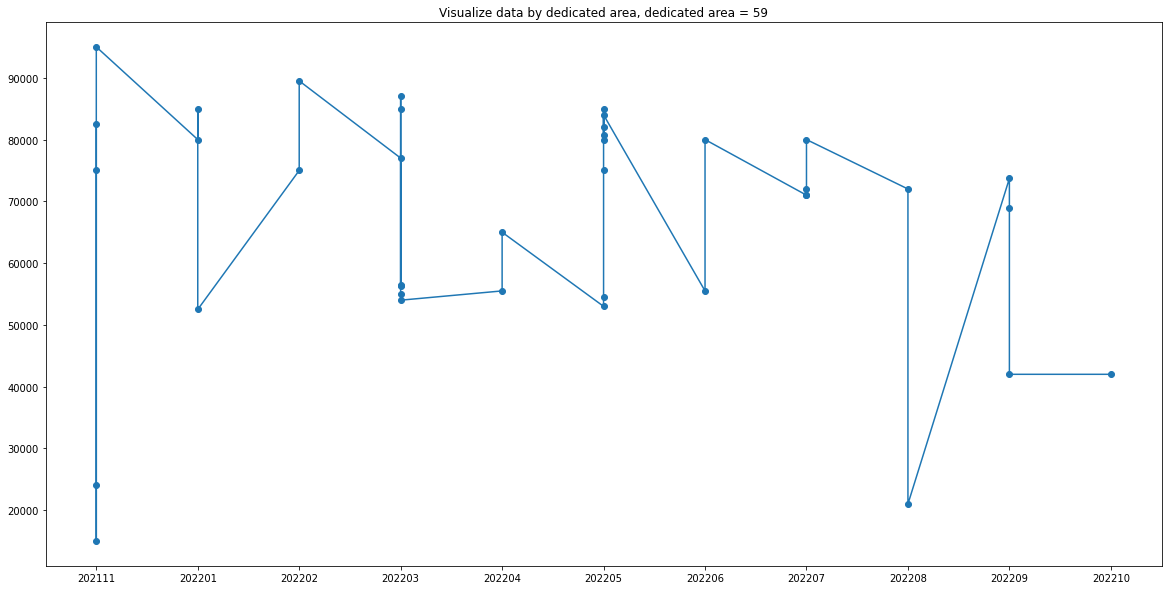

In [ ]:
# 전용면적 59일때 전체시간 
fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white')
ax = fig.add_subplot() 
 
ax.plot(p0["계약년월"],p0["거래금액(만원)"], marker='o')
 
plt.title('Visualize data by dedicated area, dedicated area = 59') ## 타이틀 설정
plt.show()

In [ ]:
# 전용면적 74
p1['계약년월'] = p1['계약년월'].astype('int')
p1 = p1.sort_values(by=['계약년월'] ,ascending = True)
p1.reset_index(drop = False, inplace = True)
p1 = p1.drop(["index"],axis = 'columns')
p1.head()

,계약년월,거래금액(만원),전용면적(㎡)
0,202111,132000,74
1,202111,90000,74
2,202111,81000,74
3,202112,112500,74
4,202201,119000,74


In [ ]:
p1['계약년월'] = p1['계약년월'].astype('str')
p1['계약년월'].apply(lambda _ : datetime.strptime(_,'%Y%m'))

0    2021-11-01
1    2021-11-01
2    2021-11-01
3    2021-12-01
4    2022-01-01
5    2022-02-01
6    2022-02-01
7    2022-04-01
8    2022-04-01
9    2022-04-01
10   2022-04-01
11   2022-04-01
12   2022-05-01
13   2022-09-01
Name: 계약년월, dtype: datetime64[ns]

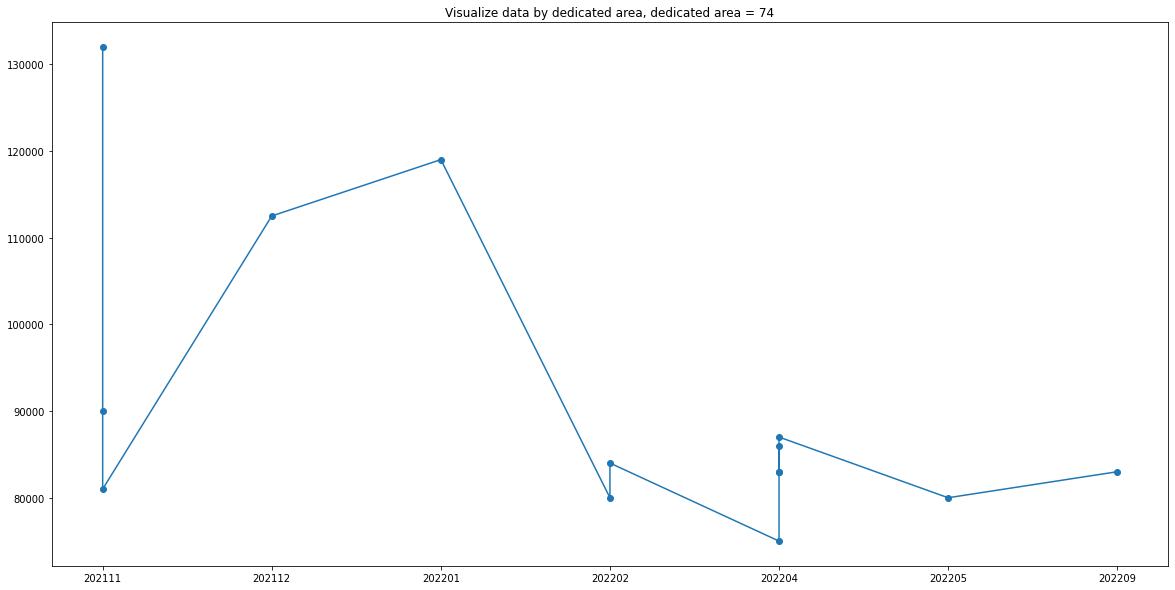

In [ ]:
# 전용면적 74일때 전체시간 
fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white')
ax = fig.add_subplot() 
 
ax.plot(p1["계약년월"],p1["거래금액(만원)"], marker='o')
 
plt.title('Visualize data by dedicated area, dedicated area = 74') ## 타이틀 설정
plt.show()

In [ ]:
# 전용면적 84
p2['계약년월'] = p2['계약년월'].astype('int')
p2 = p2.sort_values(by=['계약년월', '거래금액(만원)'] ,ascending = True)
p2.reset_index(drop = False, inplace = True)
p2 = p2.drop(["index"],axis = 'columns')
p2.head()

,계약년월,거래금액(만원),전용면적(㎡)
0,202111,83000,84
1,202111,87000,84
2,202111,89000,84
3,202111,89750,84
4,202111,95000,84


In [ ]:
p2['계약년월'] = p2['계약년월'].astype('str')
p2['계약년월'].apply(lambda _ : datetime.strptime(_,'%Y%m'))

0     2021-11-01
1     2021-11-01
2     2021-11-01
3     2021-11-01
4     2021-11-01
         ...    
99    2022-09-01
100   2022-10-01
101   2022-10-01
102   2022-10-01
103   2022-10-01
Name: 계약년월, Length: 104, dtype: datetime64[ns]

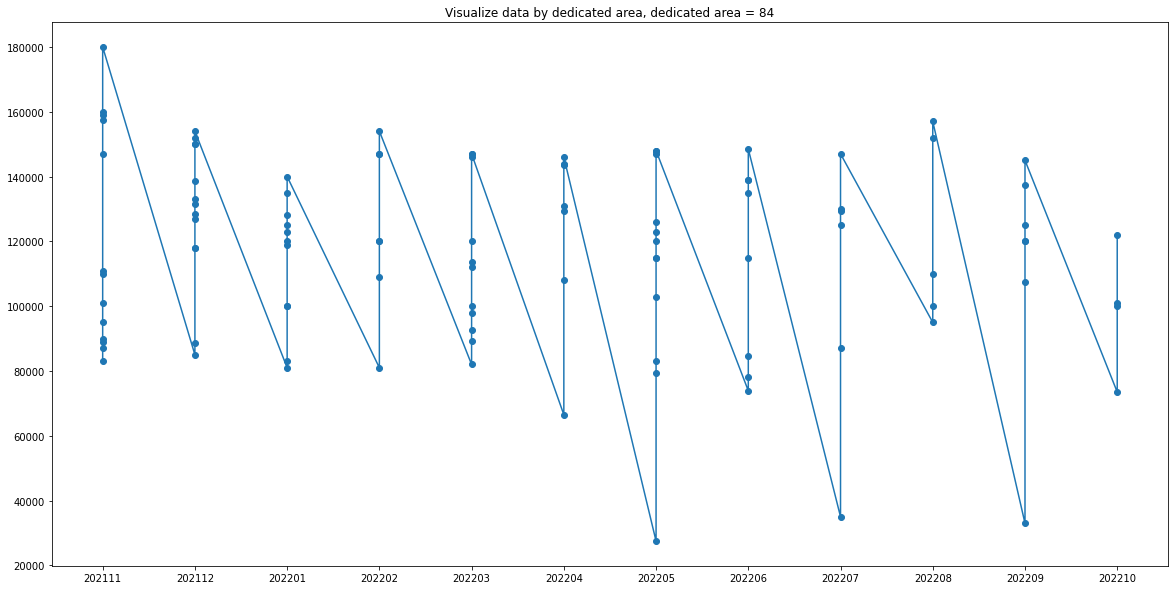

In [ ]:
# 전용면적 84일때 전체시간 
fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white')
ax = fig.add_subplot() 
 
ax.plot(p2["계약년월"],p2["거래금액(만원)"], marker='o')
 
plt.title('Visualize data by dedicated area, dedicated area = 84') ## 타이틀 설정
plt.show()

In [ ]:
# 전용면적 91
p3['계약년월'] = p3['계약년월'].astype('int')
p3 = p3.sort_values(by=['계약년월'] ,ascending = True)
p3.reset_index(drop = False, inplace = True)
p3 = p3.drop(["index"],axis = 'columns')
p3.head()

,계약년월,거래금액(만원),전용면적(㎡)
0,202201,140000,91
1,202208,130000,91
2,202208,131500,91
3,202209,122000,91


In [ ]:
p3['계약년월'] = p3['계약년월'].astype('str')
p3['계약년월'].apply(lambda _ : datetime.strptime(_,'%Y%m'))

0   2022-01-01
1   2022-08-01
2   2022-08-01
3   2022-09-01
Name: 계약년월, dtype: datetime64[ns]

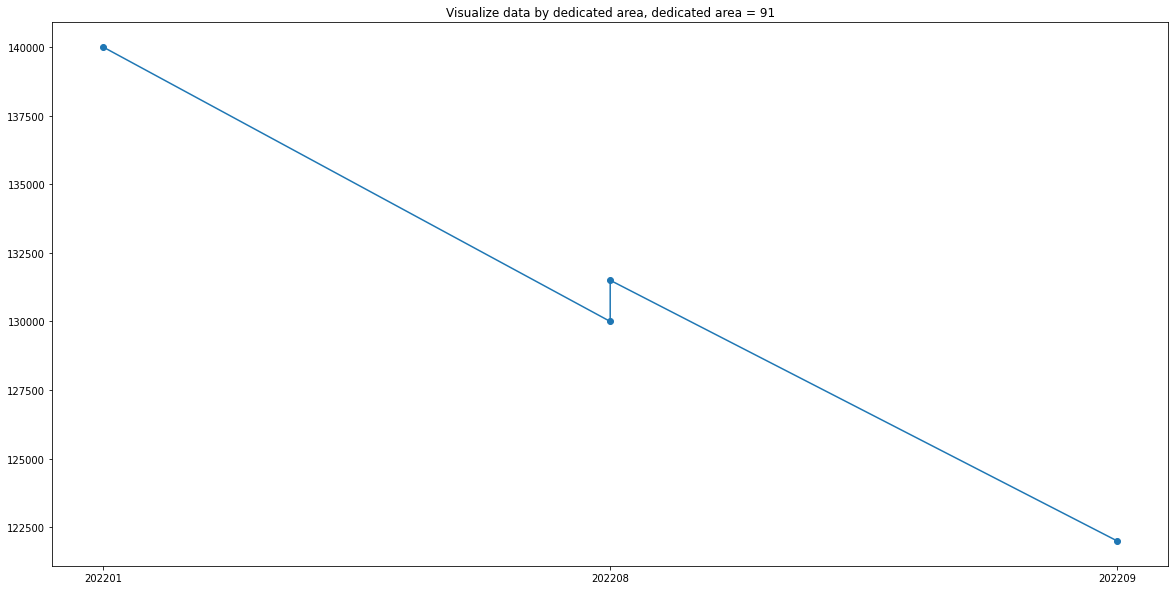

In [ ]:
# 전용면적 91일때 전체시간 
fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white')
ax = fig.add_subplot() 
 
ax.plot(p3["계약년월"],p3["거래금액(만원)"], marker='o')
 
plt.title('Visualize data by dedicated area, dedicated area = 91') ## 타이틀 설정
plt.show()

In [ ]:
# 전용면적 97
p4['계약년월'] = p4['계약년월'].astype('int')
p4 = p4.sort_values(by=['계약년월'] ,ascending = True)
p4.reset_index(drop = False, inplace = True)
p4 = p4.drop(["index"],axis = 'columns')
p4.head()

,계약년월,거래금액(만원),전용면적(㎡)
0,202203,180000,97
1,202204,180000,97
2,202204,171000,97
3,202205,160000,97
4,202206,160000,97


In [ ]:
p4['계약년월'] = p4['계약년월'].astype('str')
p4['계약년월'].apply(lambda _ : datetime.strptime(_,'%Y%m'))

0    2022-03-01
1    2022-04-01
2    2022-04-01
3    2022-05-01
4    2022-06-01
5    2022-06-01
6    2022-07-01
7    2022-07-01
8    2022-07-01
9    2022-08-01
10   2022-08-01
11   2022-09-01
Name: 계약년월, dtype: datetime64[ns]

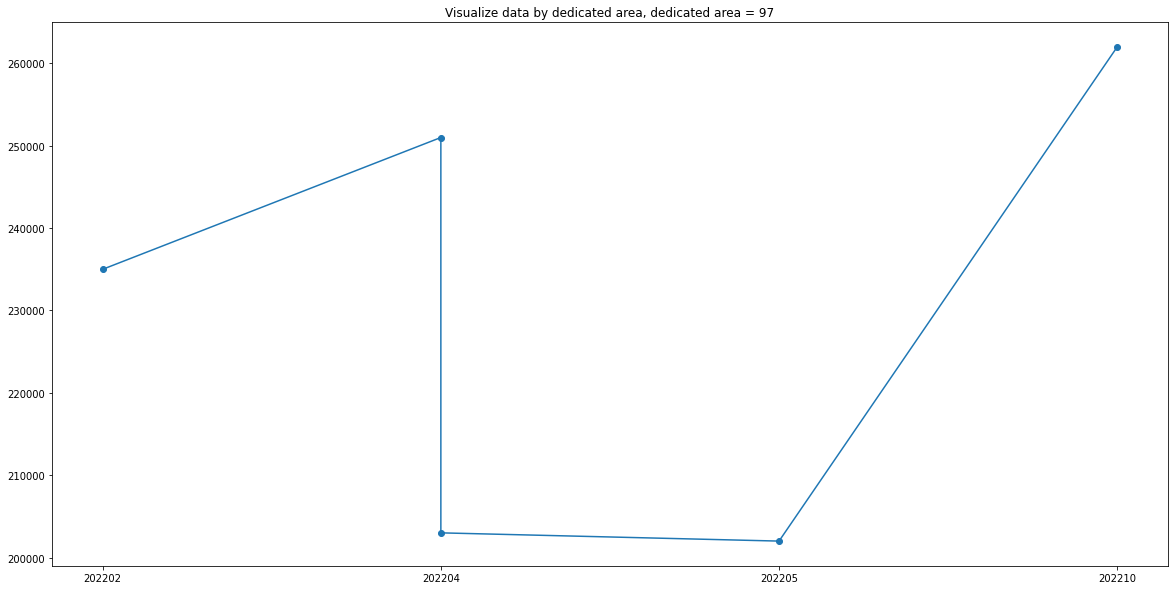

In [ ]:
# 전용면적 59일때 전체시간 
fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white')
ax = fig.add_subplot() 
 
ax.plot(p5["계약년월"],p5["거래금액(만원)"], marker='o')
 
plt.title('Visualize data by dedicated area, dedicated area = 97') ## 타이틀 설정
plt.show()

In [ ]:
# 전용면적 109
p5['계약년월'] = p5['계약년월'].astype('int')
p5 = p5.sort_values(by=['계약년월'] ,ascending = True)
p5.reset_index(drop = False, inplace = True)
p5 = p5.drop(["index"],axis = 'columns')
p5.head()

,계약년월,거래금액(만원),전용면적(㎡)
0,202202,235000,109
1,202204,251000,109
2,202204,203000,109
3,202205,202000,109
4,202210,262000,109


In [ ]:
p5['계약년월'] = p5['계약년월'].astype('str')
p5['계약년월'].apply(lambda _ : datetime.strptime(_,'%Y%m'))

0   2022-02-01
1   2022-04-01
2   2022-04-01
3   2022-05-01
4   2022-10-01
Name: 계약년월, dtype: datetime64[ns]

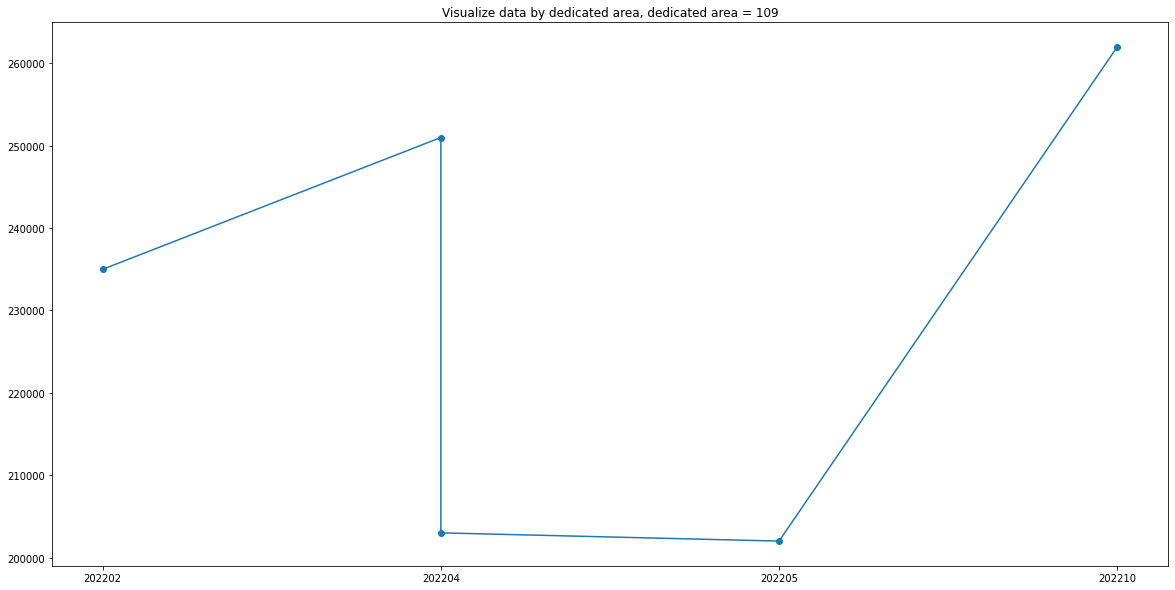

In [ ]:
# 전용면적 109일때 전체시간 
fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white')
ax = fig.add_subplot() 
 
ax.plot(p5["계약년월"],p5["거래금액(만원)"], marker='o')
 
plt.title('Visualize data by dedicated area, dedicated area = 109') ## 타이틀 설정
plt.show()

In [ ]:
# 전용면적 129
p6['계약년월'] = p6['계약년월'].astype('int')
p6 = p6.sort_values(by=['계약년월'] ,ascending = True)
p6.reset_index(drop = False, inplace = True)
p6 = p6.drop(["index"],axis = 'columns')
p6.head()

,계약년월,거래금액(만원),전용면적(㎡)
0,202201,292000,129


In [ ]:
p6['계약년월'] = p6['계약년월'].astype('str')
p6['계약년월'].apply(lambda _ : datetime.strptime(_,'%Y%m'))

0   2022-01-01
Name: 계약년월, dtype: datetime64[ns]

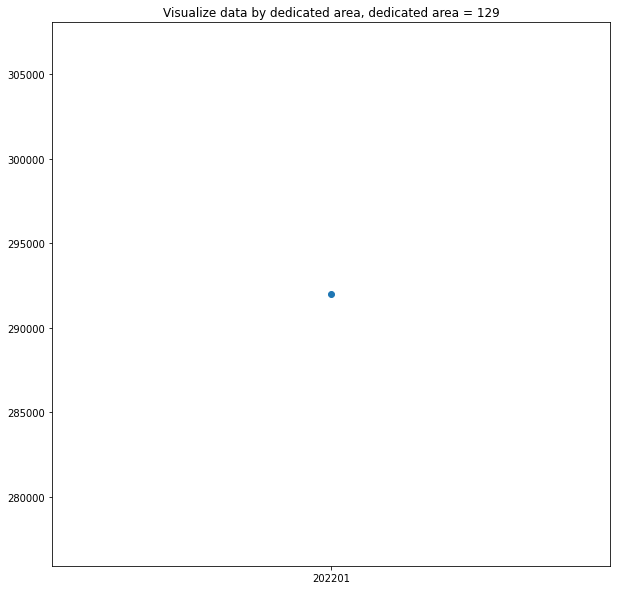

In [ ]:
# 전용면적 129일때 전체시간 
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
ax = fig.add_subplot() 
 
ax.plot(p6["계약년월"],p6["거래금액(만원)"], marker='o')
 
plt.title('Visualize data by dedicated area, dedicated area = 129') ## 타이틀 설정
plt.show()

In [ ]:
# 데이터 프레임 칼럼 "계약년월" 다시 정수화 하기
p0['계약년월'] = p0['계약년월'].astype('int')
p1['계약년월'] = p1['계약년월'].astype('int')
p2['계약년월'] = p2['계약년월'].astype('int')
p3['계약년월'] = p3['계약년월'].astype('int')
p4['계약년월'] = p4['계약년월'].astype('int')

In [ ]:
# 최근 3개월 데이터 추출하여 데이터 프레임 생성
# 전용면적 109는 10월 데이터만 있음, 전용면적 129는 최근 3개월 데이터가 없음,
# 전용면적 = 59
p0_1 = p0[p0["계약년월"] == 202208] # 2개
p0_2 = p0[p0["계약년월"] == 202209] # 3개
p0_3 = p0[p0["계약년월"] == 202210] # 1개

p0_1d = p0[p0["계약년월"] == 202208] # 2개
p0_2d = p0[p0["계약년월"] == 202209] # 3개
p0_3d = p0[p0["계약년월"] == 202210] # 1개

p0_1m = p0_1
p0_2m = p0_2 
p0_3m = p0_3

# 전용면적 = 74
p1_1 = p1[p1["계약년월"] == 202208] # 0개
p1_2 = p1[p1["계약년월"] == 202209] # 1개
p1_3 = p1[p1["계약년월"] == 202210] # 0개

# 전용면적 = 84
p2_1 = p2[p2["계약년월"] == 202208] # 5개
p2_2 = p2[p2["계약년월"] == 202209] # 7개
p2_3 = p2[p2["계약년월"] == 202210] # 4개

p2_1d = p2[p2["계약년월"] == 202208] # 5개
p2_2d = p2[p2["계약년월"] == 202209] # 7개
p2_3d = p2[p2["계약년월"] == 202210] # 4개

p2_1m = p2_1
p2_2m = p2_2
p2_3m = p2_3

# 전용면적 = 91
p3_1 = p3[p3["계약년월"] == 202208] # 2개
p3_2 = p3[p3["계약년월"] == 202209] # 1개
p3_3 = p3[p3["계약년월"] == 202210] # 0개

# 전용면적 = 97
p4_1 = p4[p4["계약년월"] == 202208] # 2개
p4_2 = p4[p4["계약년월"] == 202209] # 1개
p4_3 = p4[p4["계약년월"] == 202210] # 0개

In [ ]:
# 8월 9월 10월 데이터가 있는 전용면적 = 59와 전용면적 =  84를 활용하여 분석을 진행함,
# 전용면적 =  84는 대중적인 아파트 사이즈 이므로 공급과 수요가 제일 많아 거래가 제일 많음.
# 평균 활용하여 데이터 증가시키기

# 전용면적 = 59
p0_1m["거래금액(만원)"] = p0_1m["거래금액(만원)"].mean()
p0_1m = p0_1m.drop_duplicates()
p0_2m["거래금액(만원)"] = p0_2m["거래금액(만원)"].mean()
p0_2m = p0_2m.drop_duplicates()
p0_3m["거래금액(만원)"] = p0_3m["거래금액(만원)"].mean()
p0_3m = p0_3m.drop_duplicates()

# 전용면적 = 84
p2_1m["거래금액(만원)"] = p2_1m["거래금액(만원)"].mean()
p2_1m = p2_1m.drop_duplicates()
p2_2m["거래금액(만원)"] = p2_2m["거래금액(만원)"].mean()
p2_2m = p2_2m.drop_duplicates()
p2_3m["거래금액(만원)"] = p2_3m["거래금액(만원)"].mean()
p2_3m = p2_3m.drop_duplicates()

# 정수화하기
# 전용면적 = 59
p0_1m["거래금액(만원)"] = p0_1m["거래금액(만원)"].astype('int')
p0_2m["거래금액(만원)"] = p0_2m["거래금액(만원)"].astype('int')
p0_3m["거래금액(만원)"] = p0_3m["거래금액(만원)"].astype('int')

# 전용면적 = 84
p2_1m["거래금액(만원)"] = p2_1m["거래금액(만원)"].astype('int')
p2_2m["거래금액(만원)"] = p2_2m["거래금액(만원)"].astype('int')
p2_3m["거래금액(만원)"] = p2_3m["거래금액(만원)"].astype('int')

# 데이터 추가 데이터 프레임 생성
# 전용면적 = 59, 행 4개로 생성
# 행 4개로 생성 두배로 증가시켜 행 8개로 만들기
p0_1df = pd.concat([p0_1d, p0_1m, p0_1m],axis = 0)
p0_1df = pd.concat([p0_1df, p0_1df],axis = 0)
p0_1df.reset_index(drop = False, inplace = True)
p0_1df["계약년월"] = p0_1df["계약년월"].astype(str)
p0_1df['계약년월'].apply(lambda _ : datetime.strptime(_,'%Y%m'))
p0_1df = p0_1df.drop(["index"],axis = 'columns')

p0_2df = pd.concat([p0_2d, p0_2m],axis = 0)
p0_2df = pd.concat([p0_2df, p0_2df],axis = 0)
p0_2df.reset_index(drop = False, inplace = True)
p0_2df["계약년월"] = p0_2df["계약년월"].astype(str)
p0_2df['계약년월'].apply(lambda _ : datetime.strptime(_,'%Y%m'))
p0_2df = p0_2df.drop(["index"],axis = 'columns')

p0_3df = pd.concat([p0_3d, p0_3m, p0_3m, p0_3m],axis = 0)
p0_3df = pd.concat([p0_3df, p0_3df],axis = 0)
p0_3df.reset_index(drop = False, inplace = True)
p0_3df["계약년월"] = p0_3df["계약년월"].astype(str)
p0_3df['계약년월'].apply(lambda _ : datetime.strptime(_,'%Y%m'))
p0_3df = p0_3df.drop(["index"],axis = 'columns')


# 전용면적 = 84, 행 8개로 생성
p2_1df = pd.concat([p2_1d, p2_1m, p2_1m, p2_1m],axis = 0)
p2_1df.reset_index(drop = False, inplace = True)
p2_1df["계약년월"] = p2_1df["계약년월"].astype(str)
p2_1df['계약년월'].apply(lambda _ : datetime.strptime(_,'%Y%m'))
p2_1df = p2_1df.drop(["index"],axis = 'columns')

p2_2df = pd.concat([p2_2d, p2_2m],axis = 0)
p2_2df.reset_index(drop = False, inplace = True)
p2_2df["계약년월"] = p2_2df["계약년월"].astype(str)
p2_2df['계약년월'].apply(lambda _ : datetime.strptime(_,'%Y%m'))
p2_2df = p2_2df.drop(["index"],axis = 'columns')


p2_3df = pd.concat([p2_3d, p2_3m, p2_3m, p2_3m, p2_3m],axis = 0)
p2_3df.reset_index(drop = False, inplace = True)
p2_3df["계약년월"] = p2_3df["계약년월"].astype(str)
p2_3df['계약년월'].apply(lambda _ : datetime.strptime(_,'%Y%m'))
p2_3df = p2_3df.drop(["index"],axis = 'columns')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [ ]:
p0_1m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 33 to 33
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   계약년월      1 non-null      int64
 1   거래금액(만원)  1 non-null      int64
 2   전용면적(㎡)   1 non-null      int64
dtypes: int64(3)
memory usage: 32.0 bytes


In [ ]:
# 데이터프레임 합치기
# 전용면적 = 59
p0df = pd.concat([p0_1df, p0_2df, p0_3df],axis = 0)
p0df.reset_index(drop = False, inplace = True)
p0df = p0df.drop(["index"],axis = 'columns')
p0df = p0df.sort_values(by=['계약년월'])

# 전용면적 = 84
p2df = pd.concat([p2_1df, p2_2df, p2_3df],axis = 0)
p2df.reset_index(drop = False, inplace = True)
p2df = p2df.drop(["index"],axis = 'columns')
p2df = p2df.sort_values(by=['계약년월'])
p2df

house_ML2 = pd.concat([p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df,p0df, p2df ],axis = 0)

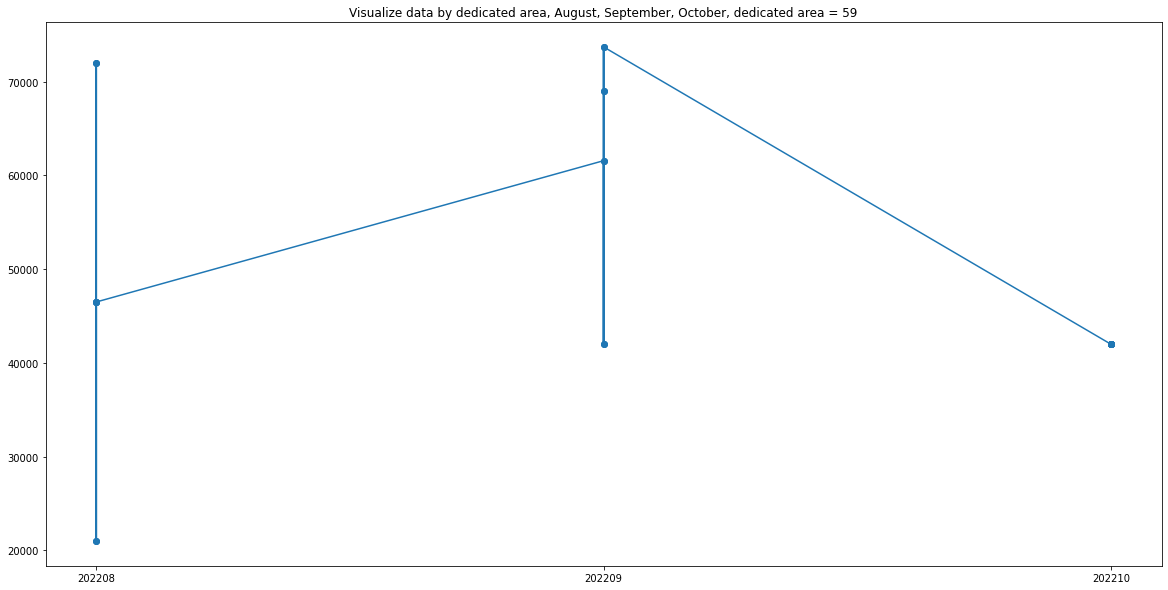

In [ ]:
# 전용면적 59, 8월 9월 10월 선형그래프
fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white')
ax = fig.add_subplot() 
 
ax.plot(p0df["계약년월"],p0df["거래금액(만원)"], marker='o')
 
plt.title('Visualize data by dedicated area, August, September, October, dedicated area = 59') ## 타이틀 설정
plt.show()

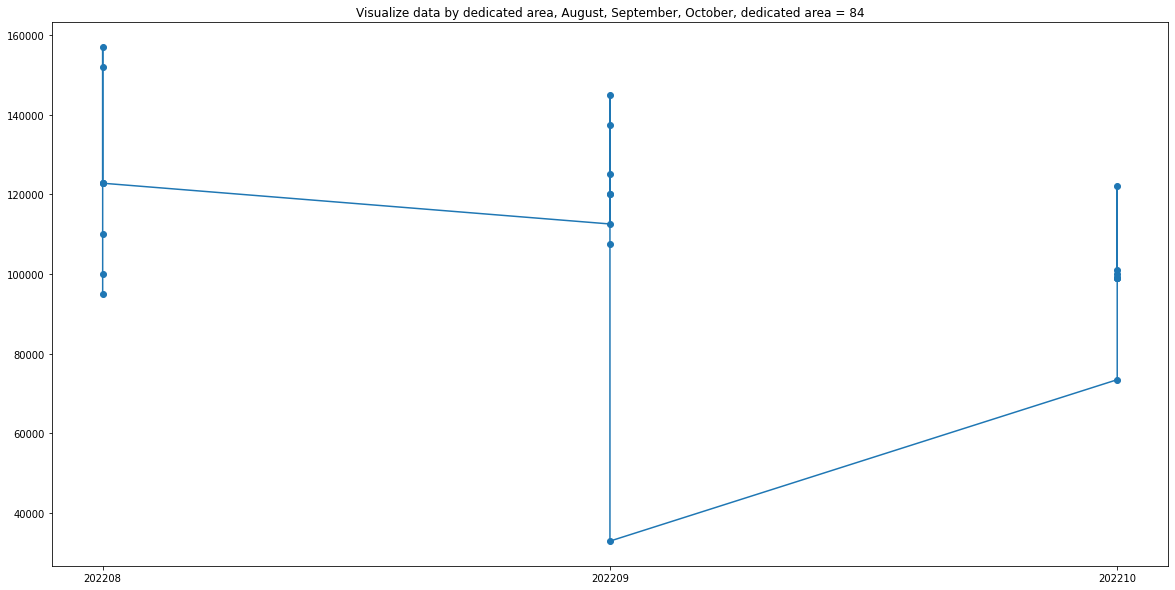

In [ ]:
# 전용면적 84, 8월 9월 10월 선형그래프
fig = plt.figure(figsize=(20,10))
fig.set_facecolor('white')
ax = fig.add_subplot() 
 
ax.plot(p2df["계약년월"],p2df["거래금액(만원)"], marker='o')
 
plt.title('Visualize data by dedicated area, August, September, October, dedicated area = 84') ## 타이틀 설정
plt.show()

4. 부동산 증감률 (값old-값new /값new* 100) 식을 이용해서 최근 3개월간 거주 지역의 변화를 그래프로 그리세요.

In [ ]:
p0_1m_drop = p0_1m.drop(['계약년월', '전용면적(㎡)'], axis = 1)
p0_2m_drop = p0_2m.drop(['계약년월', '전용면적(㎡)'], axis = 1)
p0_3m_drop = p0_3m.drop(['계약년월', '전용면적(㎡)'], axis = 1)
p2_1m_drop = p2_1m.drop(['계약년월', '전용면적(㎡)'], axis = 1)
p2_2m_drop = p2_2m.drop(['계약년월', '전용면적(㎡)'], axis = 1)
p2_3m_drop = p2_3m.drop(['계약년월', '전용면적(㎡)'], axis = 1)

p0_1m_value = p0_1m_drop["거래금액(만원)"].values
p0_2m_value = p0_2m_drop["거래금액(만원)"].values
p0_3m_value = p0_3m_drop["거래금액(만원)"].values
p2_1m_value = p2_1m_drop["거래금액(만원)"].values
p2_2m_value = p2_2m_drop["거래금액(만원)"].values
p2_3m_value = p2_3m_drop["거래금액(만원)"].values

In [ ]:
# 전용면적 59.
# 8월 ~ 9월 
p0_89 = ((p0_1m_value - p0_2m_value)/p0_2m_value)*100
# 9월 ~ 10월
p0_910 = ((p0_2m_value - p0_3m_value)/p0_3m_value)*100

# 전용면적 84.
# 8월 ~ 9월 
p2_89 = ((p2_1m_value - p2_2m_value)/p2_2m_value)*100
# 9월 ~ 10월
p2_910 = ((p2_2m_value - p2_3m_value)/p2_3m_value)*100

In [ ]:
p2_910 

array([13.56469105])

In [ ]:
p0_89df = pd.DataFrame({"계약년월":["8월 ~ 9월"], "부동산 증감률":[p0_89]})
p0_910df = pd.DataFrame({"계약년월":["9월 ~ 10월"], "부동산 증감률":[p0_910]})
p2_89df = pd.DataFrame({"계약년월":["8월 ~ 9월"], "부동산 증감률":[p2_89]})
p2_910df = pd.DataFrame({"계약년월":["9월 ~ 10월"], "부동산 증감률":[p2_910]})

In [ ]:
p2_910df 

,계약년월,부동산 증감률
0,9월 ~ 10월,[13.56469104665826]


In [ ]:
부동산_증감률59 = pd.concat([p0_89df, p0_910df])
부동산_증감률59.reset_index(drop = False, inplace = True)
부동산_증감률59 = 부동산_증감률59.drop(["index"],axis = 'columns')

부동산_증감률84 = pd.concat([p2_89df, p2_910df])
부동산_증감률84.reset_index(drop = False, inplace = True)
부동산_증감률84 = 부동산_증감률84.drop(["index"],axis = 'columns')
부동산_증감률59

,계약년월,부동산 증감률
0,8월 ~ 9월,[-24.47129909365559]
1,9월 ~ 10월,[46.58571428571429]


In [ ]:
부동산_증감률84

,계약년월,부동산 증감률
0,8월 ~ 9월,[9.086709720976096]
1,9월 ~ 10월,[13.56469104665826]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)


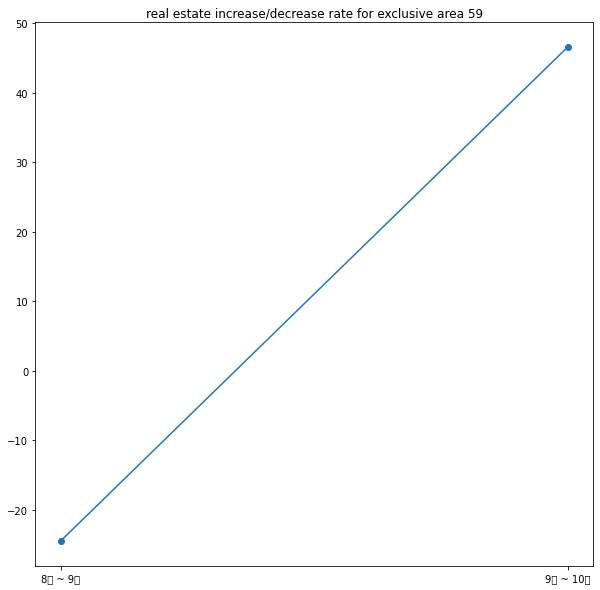

In [ ]:
# 전용면적 59, 부동산_증감률 그래프
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
ax = fig.add_subplot() 
 
ax.plot(부동산_증감률59["계약년월"], 부동산_증감률59["부동산 증감률"], marker='o')
 
plt.title('real estate increase/decrease rate for exclusive area 59') ## 타이틀 설정
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0, flags=flags)


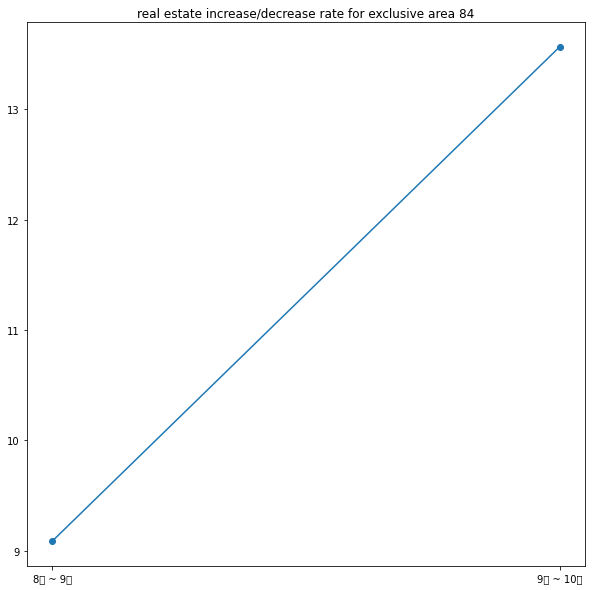

In [ ]:
# 전용면적 84, 부동산_증감률 그래프
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
ax = fig.add_subplot() 
 
ax.plot(부동산_증감률84["계약년월"], 부동산_증감률84["부동산 증감률"], marker='o')
 
plt.title('real estate increase/decrease rate for exclusive area 84') ## 타이틀 설정
plt.show()

5. 변환된 데이터프레임을 가지고 주차 강의에 올려진 'House.ipynb' 보스턴 집값 예측 예제를 참고로 다음을 실행하세요
    5.1 상관 분석을 통해서 어떤 변수가 집값에 영향을 미치는지 그래프로 보이고 결과를 분석하세요
    5.2 회귀 직선을 그려보세요.
    5.3 데이터를 훈련과 학습 데이터로 나누고 학습을 통한 결과를 통화 선형 회귀를 통해서 집값을 예측하세요.
    5.4 MSE , RMSE, R^2 score 를 통해서 선형 회귀 모델의 성능을 평가하세요

In [ ]:
house_ML['전용면적(㎡)'] = house_ML['전용면적(㎡)'].astype('int')

In [ ]:
house_ML.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 73 to 289
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   전용면적(㎡)   10 non-null     int64
 1   층         10 non-null     int64
 2   건축년도      10 non-null     int64
 3   거래금액(만원)  10 non-null     int64
dtypes: int64(4)
memory usage: 400.0 bytes


In [ ]:
house_ML.isnull().sum()

전용면적(㎡)     0
층           0
건축년도        0
거래금액(만원)    0
dtype: int64

In [ ]:
house_ML.rename(columns = {"거래금액(만원)":"Transaction amount",
                           "전용면적(㎡)":"Dedicated area",
                          "층": "Layer", 
                          "건축년도": "Year of construction"}, inplace = True)

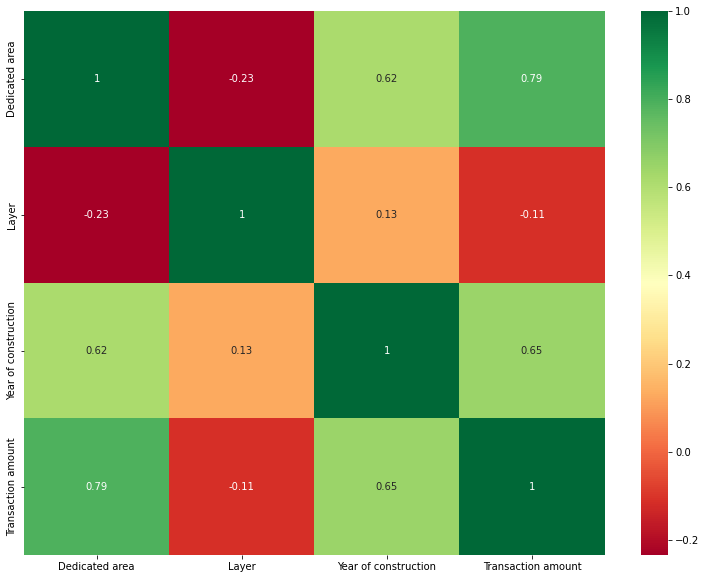

In [ ]:
#5.1 상관 분석
corrmat = house_ML.corr()
corrmat
corr_columns = corrmat.index[abs(corrmat["Transaction amount"])>=0]
corr_columns
plt.figure(figsize=(13,10))
heatmap = sns.heatmap(house_ML[corr_columns].corr(),annot=True,cmap="RdYlGn")
# 집의 전용면적과 거래금액이 밀접한 연관이 있음을 알 수 있다.

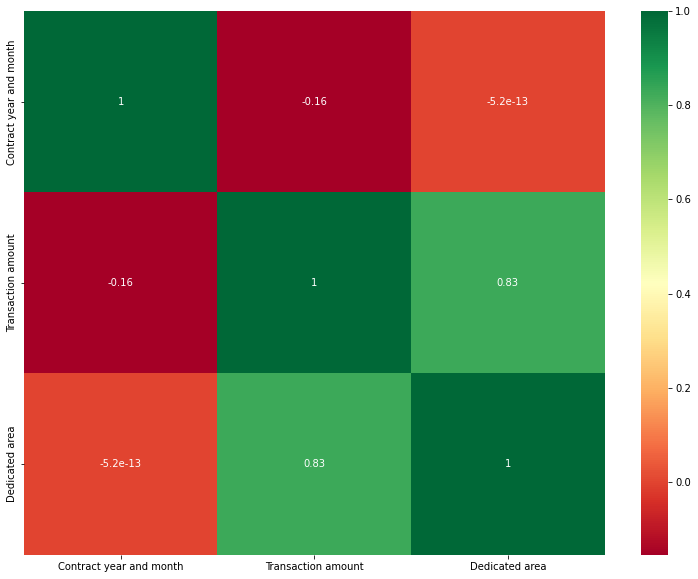

In [ ]:
#5.1 상관 분석
corrmat = house_ML2.corr()
corrmat
corr_columns = corrmat.index[abs(corrmat["Transaction amount"])>=0]
corr_columns
plt.figure(figsize=(13,10))
heatmap = sns.heatmap(house_ML2[corr_columns].corr(),annot=True,cmap="RdYlGn")


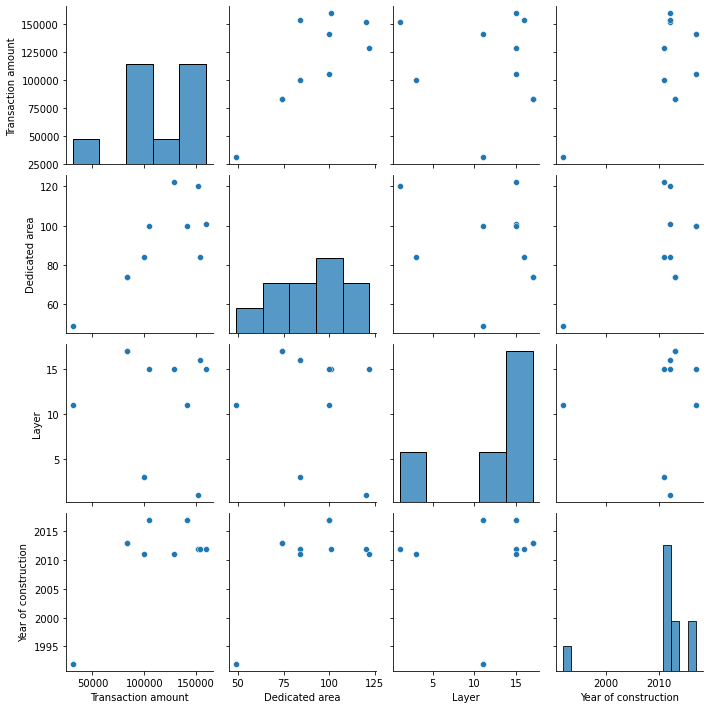

In [ ]:
sns.pairplot(house_ML[["Transaction amount","Dedicated area","Layer", "Year of construction"]]) 
plt.show()

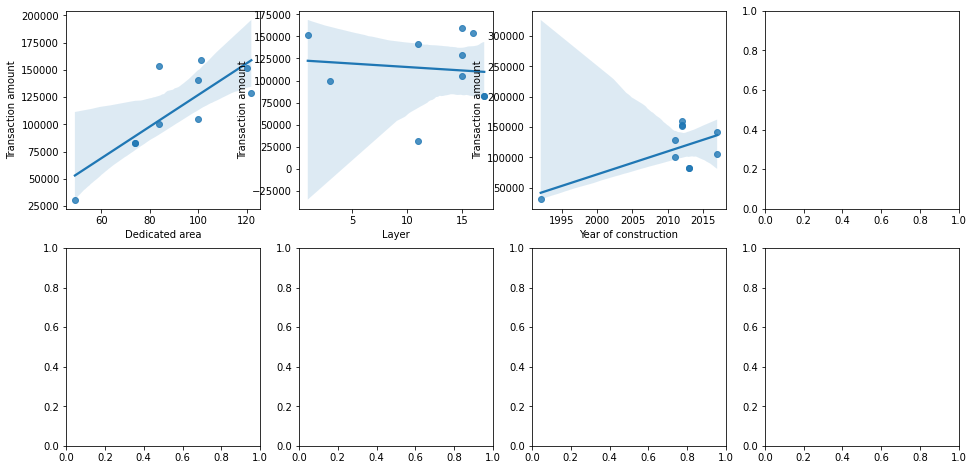

In [ ]:
#5.2 회귀 직선
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)

lm_features = ["Dedicated area","Layer", "Year of construction"]

for i, feature in enumerate(lm_features):
    row = int(i/4) # 2행
    col = i%4

    # sns.regplot : 회귀직선을 그려줌
    sns.regplot(x=feature, y="Transaction amount", data=house_ML, ax=axs[row][col])

In [ ]:
#5.3 선형 회귀를 통해서 집값을 예측
# feature, target 데이터 분리
y_target = house_ML["Transaction amount"] # 종속변수
X_data = house_ML.drop(["Transaction amount"], axis=1, inplace=False) # 피처(독립변수)
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target , test_size=0.3, random_state=156)

In [ ]:
# Linear Regression
lr = LinearRegression()

# fit 메소드 학습 : 주어진 데이터로 알고리즘 학습
lr.fit(X_train, y_train)
print(X_train.shape, X_test.shape)

(7, 3) (3, 3)


In [ ]:
# predict 메소드 : 학습된 모델로 예측을 수행
y_preds = lr.predict(X_test)
y_preds[0:5]

array([ 97306.15327063, 124880.8901063 ,  85160.32460088])

In [ ]:
#5.4 MSE , RMSE, R^2 score
# rmse를 활용한 평가
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print(f'MSE : {mse:.3f}, RMSE: {rmse:.3f}')
print(f'Variance score : {r2_score(y_test, y_preds):.3f}')
print(f'Explained_variance_score : {explained_variance_score(y_test, y_preds):.3f}')

MSE : 1159561654.373, RMSE: 34052.337
Variance score : -0.217
Explained_variance_score : 0.365
